In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
print("Setup Complete")

Setup Complete


In [2]:
#Read in the data
all_data = pd.read_csv(r"C:\Users\paraicoreilly\Desktop\project_code\PM\all_data_organised.csv",index_col="date",parse_dates=True,dayfirst=True)
test_data = pd.read_csv(r'C:\Users\paraicoreilly\Desktop\project_code\PM\PM25_test.csv')
print("data loaded \n")

data loaded 



In [3]:
#Check the first few rows and describte the data to check it is loaded in correctly
print(all_data.head(3))
print("\n")
print(all_data.describe())
print("\n")

            PM25  temp  r_hum  wdsp   msl
date                                     
2009-01-01  31.1   3.4   90.4   7.8  1029
2009-01-02  15.2   3.7   77.4   8.5  1031
2009-01-03  17.4   2.8   67.0   6.1  1030


              PM25         temp        r_hum         wdsp          msl
count  3302.000000  3652.000000  3652.000000  3652.000000  3652.000000
mean     10.280389     9.643565    82.927410    10.698083  1013.238226
std       8.899069     4.587299     7.209473     4.318353    11.861392
min      -0.200000    -8.100000    54.000000     2.300000   960.000000
25%       5.000000     6.300000    78.000000     7.500000  1006.000000
50%       7.300000     9.800000    83.100000     9.900000  1014.000000
75%      12.200000    13.300000    88.200000    13.300000  1021.000000
max     107.700000    21.100000   100.000000    28.800000  1042.000000




In [4]:
# Outlier detection
up_p = all_data['PM25'].mean() + 2*all_data['PM25'].std()
low_p = all_data['PM25'].mean() - 2*all_data['PM25'].std()
# Replace outlier by interpolation for base consumption
all_data.loc[all_data['PM25'] > up_p, 'PM25'] = np.nan
all_data.loc[all_data['PM25'] < low_p, 'PM25'] = np.nan
all_data['PM25'].interpolate(inplace=True)
all_data.dropna(axis=0, inplace=True)

print(all_data.describe())

              PM25         temp        r_hum         wdsp          msl
count  3651.000000  3651.000000  3651.000000  3651.000000  3651.000000
mean      9.240641     9.645275    82.925363    10.698877  1013.233909
std       5.812234     4.586763     7.209400     4.318678    11.860147
min      -0.200000    -8.100000    54.000000     2.300000   960.000000
25%       4.900000     6.300000    78.000000     7.500000  1006.000000
50%       7.300000     9.800000    83.100000     9.900000  1014.000000
75%      12.155050    13.300000    88.150000    13.300000  1021.000000
max      28.000000    21.100000   100.000000    28.800000  1042.000000


In [5]:
#Drop the rows that have missing values from the data frame - need to adjust this - try with mean values filling in - also need to set aside data for test set
all_data.dropna(axis=0, inplace=True)
test_data.dropna(axis=0, inplace=True)

In [6]:
#Store PM_25 (the target variable) in y 
y = all_data.PM25
y.describe()
features = ['wdsp','r_hum','temp']

#Store the data for the features in X
X = all_data[features] 
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 42, test_size=.02)

In [7]:
lin = LinearRegression()
lin.fit(train_X,train_y)

LinearRegression()

In [8]:
# Model performance
scores = cross_val_score(lin, train_X, train_y, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.256 +/- 0.044


In [9]:
val_pred = lin.predict(val_X)
mae_scores = -cross_val_score(lin, X, y, cv=5, scoring='neg_mean_absolute_error')
mse_scores = -cross_val_score(lin, X, y, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(lin, X, y, cv=5, scoring='r2')
std = 8.899069
variability = std/mae_scores.mean()


In [10]:
print('Metrics for the validation set using cross-validation:\n')
print('Mean Absolute Error:', mae_scores.mean())
print('Mean Squared Error:', mse_scores.mean())
print('R^2 Score:', r2_scores.mean())
print('Variability:',variability)

Metrics for the validation set using cross-validation:

Mean Absolute Error: 3.829155759025516
Mean Squared Error: 25.750329178826394
R^2 Score: 0.21890035065115043
Variability: 2.3240289922979604


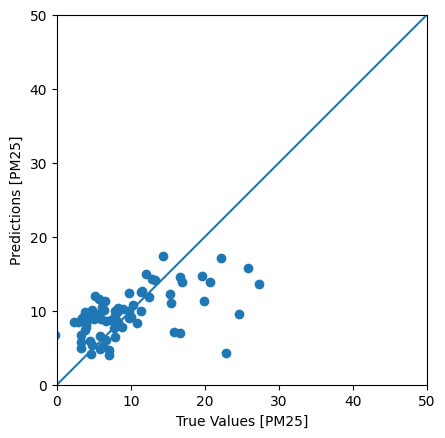

In [11]:
val_predictions = lin.predict(val_X).flatten()

a = plt.axes(aspect='equal')
plt.scatter(val_y, val_predictions)
plt.xlabel('True Values [PM25]')
plt.ylabel('Predictions [PM25]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [12]:
test_data = pd.read_csv(r'C:\Users\paraicoreilly\Desktop\project_code\PM\PM25_test.csv')
test_data.dropna(axis=0, inplace=True)
test_y = test_data.PM25
test_x = test_data[features]

In [13]:
test_pred = lin.predict(test_x)
# calculate metrics
test_mae = mean_absolute_error(test_y, test_pred)
test_mse = mean_squared_error(test_y, test_pred)
test_r2 = r2_score(test_y, test_pred)
test_std = 7.366215
test_variability = std/test_mae

In [14]:
print('Metrics for the validation set using cross-validation:\n')
print('Mean Absolute Error:', test_mae)
print('Mean Squared Error:', test_mse)
print('R^2 Score:', test_r2)
print('Variability:',test_variability)

Metrics for the validation set using cross-validation:

Mean Absolute Error: 5.438679447774534
Mean Squared Error: 56.95920131462241
R^2 Score: -0.05260792114438506
Variability: 1.6362554707359027


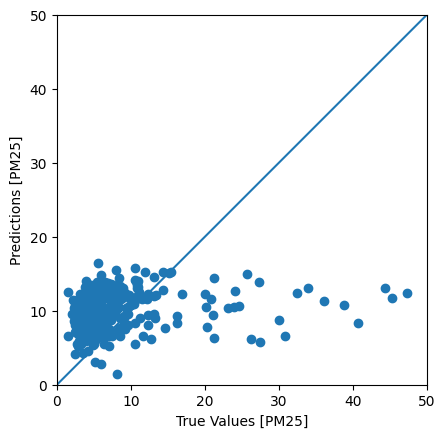

In [15]:
test_predictions = lin.predict(test_x).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_y, test_predictions)
plt.xlabel('True Values [PM25]')
plt.ylabel('Predictions [PM25]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)